# Embedding

```
📌 An embedding is a numerical representation of a piece of
 information, for example, text, documents, images, audio,
 etc. The representation captures the semantic meaning of what
  is being embedded, making it robust for many industry applications.
```

### Word2Vec using Gensim

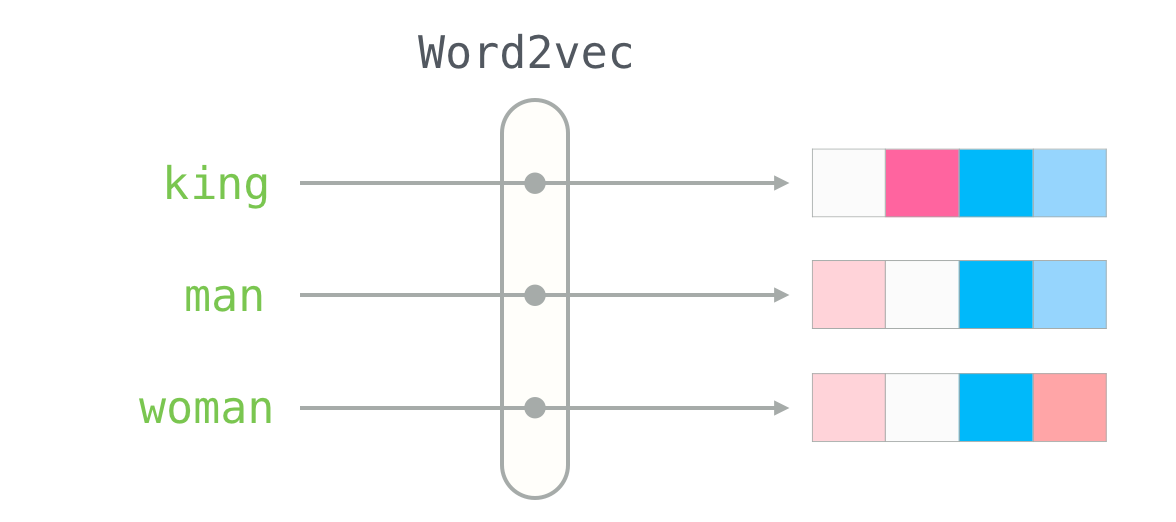

In [1]:
from gensim.models import Word2Vec
from gensim.downloader import load

In [2]:
model = load("glove-wiki-gigaword-50")  # or use word2vec-google-news-300

In [3]:
print(model['king'])

[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]


In [4]:
# Vector similarity
print(model.similarity('man', 'woman'))         
print(model.similarity('king', 'queen'))  

0.8860338
0.7839043


In [5]:
result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
result

[('queen', 0.8523604273796082)]

### Web scraping

📌 ` First, we will retrieves the content of a Wikipedia page, `isolates the paragraphs, and combines them into a single piece of text for further processing.

📌 `bs4:` Beautiful Soup is used to extract data from HTML and XML files, like the Wikipedia page.

In [6]:
import bs4 as bs
import urllib.request
import re
import nltk

In [7]:
scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')
scrapped_data

In [8]:
article = scrapped_data.read()
article

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Artificial intelligence - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-ena

In [9]:
parsed_article = bs.BeautifulSoup(article,'lxml')
parsed_article

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Artificial intelligence - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled v

In [10]:
paragraphs = parsed_article.find_all('p')
paragraphs

[<p class="mw-empty-elt">
 </p>,
 <p><b>Artificial intelligence</b> (<b>AI</b>) is the capability of <a href="/wiki/Computer" title="Computer">computational systems</a> to perform tasks typically associated with <a href="/wiki/Human_intelligence" title="Human intelligence">human intelligence</a>, such as <a href="/wiki/Learning" title="Learning">learning</a>, <a href="/wiki/Reason" title="Reason">reasoning</a>, <a href="/wiki/Problem_solving" title="Problem solving">problem-solving</a>, <a href="/wiki/Perception" title="Perception">perception</a>, and <a href="/wiki/Decision-making" title="Decision-making">decision-making</a>. It is a <a class="mw-redirect" href="/wiki/Field_of_research" title="Field of research">field of research</a> in <a href="/wiki/Computer_science" title="Computer science">computer science</a> that develops and studies methods and <a href="/wiki/Software" title="Software">software</a> that enable machines to <a href="/wiki/Machine_perception" title="Machine percep

In [11]:
article_text = ""

for p in paragraphs:
    article_text += p.text

article_text

'\nArtificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.[1]\nHigh-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., language models and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into general applications, often without bein

### Text preprocessing

`📌 Preprocessing steps`

In [12]:
import nltk
from nltk.corpus import stopwords

In [13]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Cleaing the text

In [14]:
processed_article = article_text.lower()
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )
processed_article = re.sub(r'\s+', ' ', processed_article)

Preparing the dataset

In [15]:
all_words = nltk.word_tokenize(processed_article)
all_words

['artificial',
 'intelligence',
 'ai',
 'is',
 'the',
 'capability',
 'of',
 'computational',
 'systems',
 'to',
 'perform',
 'tasks',
 'typically',
 'associated',
 'with',
 'human',
 'intelligence',
 'such',
 'as',
 'learning',
 'reasoning',
 'problem',
 'solving',
 'perception',
 'and',
 'decision',
 'making',
 'it',
 'is',
 'a',
 'field',
 'of',
 'research',
 'in',
 'computer',
 'science',
 'that',
 'develops',
 'and',
 'studies',
 'methods',
 'and',
 'software',
 'that',
 'enable',
 'machines',
 'to',
 'perceive',
 'their',
 'environment',
 'and',
 'use',
 'learning',
 'and',
 'intelligence',
 'to',
 'take',
 'actions',
 'that',
 'maximize',
 'their',
 'chances',
 'of',
 'achieving',
 'defined',
 'goals',
 'high',
 'profile',
 'applications',
 'of',
 'ai',
 'include',
 'advanced',
 'web',
 'search',
 'engines',
 'e',
 'g',
 'google',
 'search',
 'recommendation',
 'systems',
 'used',
 'by',
 'youtube',
 'amazon',
 'and',
 'netflix',
 'virtual',
 'assistants',
 'e',
 'g',
 'google',

Removing Stop Words

In [16]:
stop_words = set(stopwords.words('english'))

In [18]:
cleaned_text = [word for word in all_words if word not in stop_words]
cleaned_text

['artificial',
 'intelligence',
 'ai',
 'capability',
 'computational',
 'systems',
 'perform',
 'tasks',
 'typically',
 'associated',
 'human',
 'intelligence',
 'learning',
 'reasoning',
 'problem',
 'solving',
 'perception',
 'decision',
 'making',
 'field',
 'research',
 'computer',
 'science',
 'develops',
 'studies',
 'methods',
 'software',
 'enable',
 'machines',
 'perceive',
 'environment',
 'use',
 'learning',
 'intelligence',
 'take',
 'actions',
 'maximize',
 'chances',
 'achieving',
 'defined',
 'goals',
 'high',
 'profile',
 'applications',
 'ai',
 'include',
 'advanced',
 'web',
 'search',
 'engines',
 'e',
 'g',
 'google',
 'search',
 'recommendation',
 'systems',
 'used',
 'youtube',
 'amazon',
 'netflix',
 'virtual',
 'assistants',
 'e',
 'g',
 'google',
 'assistant',
 'siri',
 'alexa',
 'autonomous',
 'vehicles',
 'e',
 'g',
 'waymo',
 'generative',
 'creative',
 'tools',
 'e',
 'g',
 'language',
 'models',
 'ai',
 'art',
 'superhuman',
 'play',
 'analysis',
 'strate

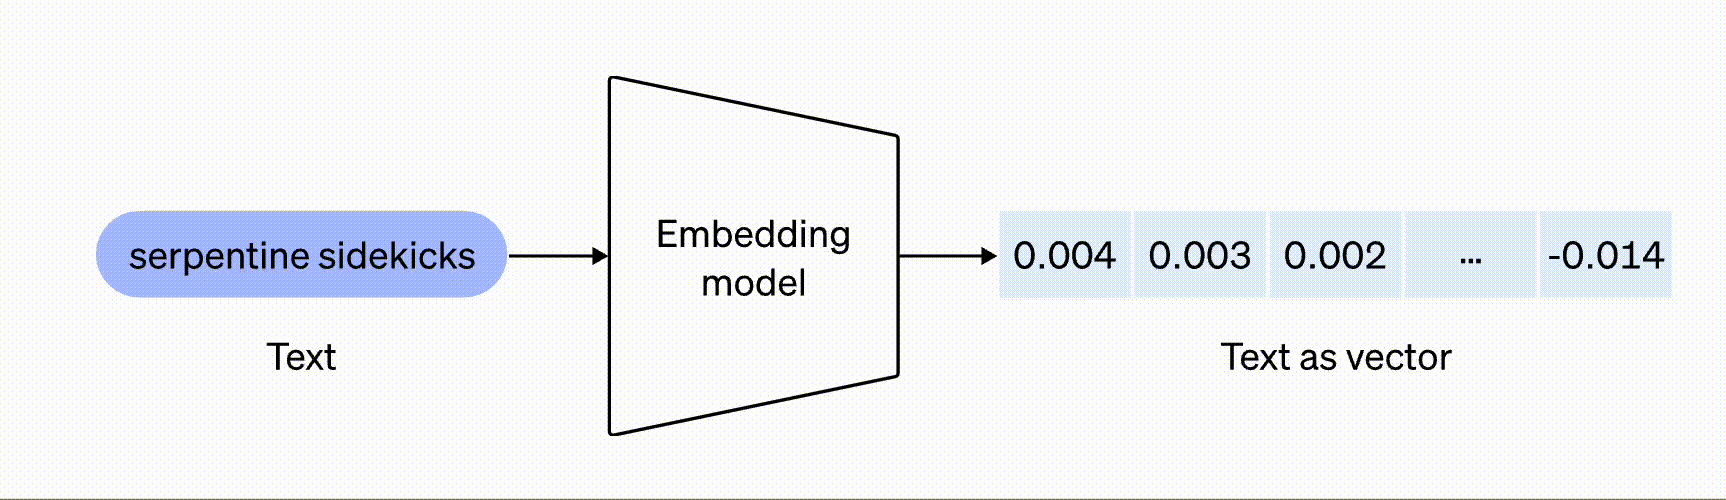


📌 Next, we will do `word embeddings`

📌 Word embeddings capture the semantic relationships between words in a numerical form that machines can understand
`Parameter`	- *Description*

`cleaned_text`	*Training data*

`min_count`	Frequency threshold

`alpha`	Learning rate

`vector_size`	Embedding dimensions

`window`	Context range

`epochs`	Training iterations

`sg`	Algorithm choice *(`in this case sg=0, meaning it is CBOW model`)*
__________________________

### What is the difference between CBOW (Continuous Bag of Words) and Skip-Gram?

📌 CBOW: Predicts a target word from surrounding context words.

📌 Skip-Gram: Predicts surrounding context words from a target word.

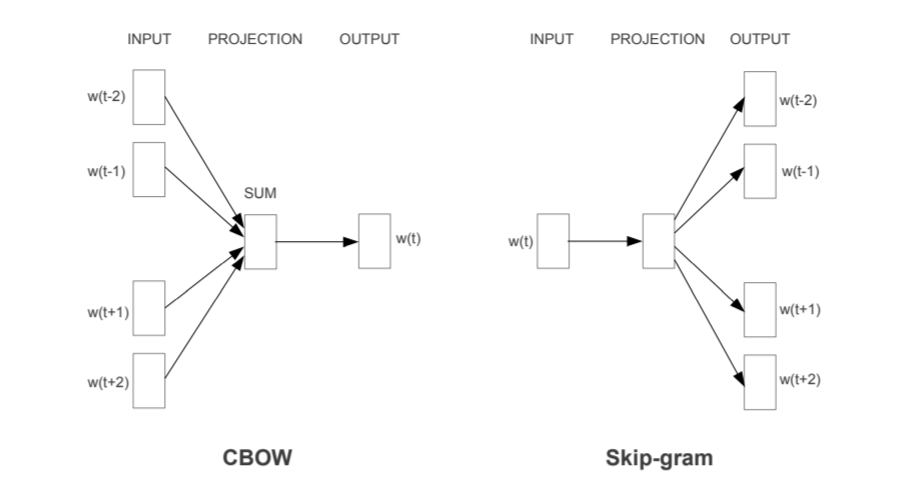


In [19]:
from gensim.models import Word2Vec

In [20]:
word2vec = Word2Vec([cleaned_text], min_count=2, alpha=0.025, vector_size=100,
                    window=5, epochs=155,  sg=0)

📌 Note: Word2Vec processes text by considering the context of words within sentences. This requires the input to be structured as a list of sentences (lists of words).

that's why we used `[cleaned_text]` as training data

In [21]:
word2vec.wv['artificial']

array([ 0.8241403 , -0.11121187,  2.1588945 ,  1.5176736 , -0.42146862,
       -0.6932412 ,  0.44991356,  0.14099199, -0.3977667 ,  0.24623556,
       -0.2774328 , -1.3903296 ,  0.19390512,  0.16663164,  0.11396829,
       -1.1292793 , -0.12638755, -0.83291835, -1.5726374 , -1.2125028 ,
        0.2949035 ,  0.12526795,  1.4876676 , -0.774564  , -1.0876793 ,
        1.382156  , -1.0962437 ,  0.82659733, -2.1922002 ,  0.5050912 ,
       -0.41715604,  0.35160956, -0.78276765, -2.0930784 ,  1.0431415 ,
        0.23256895,  1.4430906 ,  1.0909929 , -1.4955335 ,  0.65391046,
        1.4061515 , -0.4087444 , -1.4364192 ,  0.8715617 ,  1.3551276 ,
        0.70398945, -0.80362624,  0.5125722 ,  1.848752  , -0.29916364,
       -0.23872934, -2.1050227 ,  0.03179822, -0.14168382, -0.70606446,
        0.5517036 , -0.7283241 , -1.4249678 , -1.0046757 ,  0.58802056,
        0.6164495 , -0.14687648, -0.4541379 ,  0.7900637 , -0.7685507 ,
        1.3036853 , -1.2034923 ,  0.93174297,  0.5559657 , -0.67

📌 most similar 3 words to word 'artitficial'

In [22]:
word2vec.wv.most_similar(positive = ['artificial'] , topn = 3)

[('intelligence', 0.8247452974319458),
 ('subfield', 0.8004053831100464),
 ('mccarthy', 0.7018532752990723)]

📌 Note: The model is trained using CBOW and used here for word similarity, but it can also be used for tasks like predicting a missing word or finding related words.
